In [1]:
# This script contains the following processing:
# 1. Amplitude vs ETC f=3.7 THz jid = 465594,467908,465596,465595,465597,467397,467421,467425,467427

# 2. Amplitude vs ETC f = 4 THz jid = 471219, 473509,471220,471222,473510,471223,473512,471224,471225

# 3. Processing the data of jid=473512

In [3]:
"""This script has following capabilities:
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import glob
import shutil
import re

from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
from scipy.interpolate import make_interp_spline

In [4]:
plt.rcParams.update({'font.serif':'Arial', 'font.size': 14.0, 
                     'xtick.labelsize': 13, 'ytick.labelsize': 13,
                    'legend.fontsize':12,
                    'figure.dpi': 80.0, 'figure.figsize': [9, 5]})
# print(plt.rcParams)

In [5]:
# Defn:
def read_file(filename, skiplines):
    with open(filename) as file:
        lines = file.readlines()
        total_lines = len(lines)
#         print('Total lines:', total_lines)

    # Read the data:
    rlines = lines[skiplines:]
    # Extract data from file
    data = np.array([list(map(float, line.strip().split())) for line in rlines])
#     print("Shape of data:", data.shape)
    header = lines[skiplines-1].strip().split()
    dt = data[1][0] - data[0][0]; # Time interval between data
    return header, dt, data

def ERC_avg(arr, avg_lines):
    """arr = only the data from Energy_etc_erc_*.dat
    avg_lines = no. of lines to average after reading the data"""
    # Read the data into a pandas DataFrame
    pd_data = pd.DataFrame(arr, columns = header)
    pd_data['ERC'] = pd_data['Au_etotal']/pd_data['Au_etotal'][0]; # Calculating ERC
    pd_data['ETC'] = 1- pd_data['ERC']                             # Calculating ETC
    avg_data = pd_data.groupby(pd_data.index // avg_lines).mean()
    return pd_data, avg_data

def ERC_avg_precise(Au_energy, arr, avg_lines):
    """arr = only the data from Energy_etc_erc_*.dat
    avg_lines = no. of lines to average after reading the data
    Au_energy = Total energy of Au before wave-packet. """
    
    # Read the data into a pandas DataFrame
    pd_data = pd.DataFrame(arr, columns = header)
    pd_data['Au_etotal'] = pd_data['Au_PE'] + pd_data['Au_KE'] - Au_energy
    pd_data['ERC'] = pd_data['Au_etotal']/pd_data['Au_etotal'][0]; # Calculating ERC
    pd_data['ETC'] = 1- pd_data['ERC']                             # Calculating ETC
    avg_data = pd_data.groupby(pd_data.index // avg_lines).mean()
    return pd_data, avg_data

# def ERC_avg_precise(Au_energy, arr, avg_lines):
#     """arr = only the data from Energy_etc_erc_*.dat
#     avg_lines = no. of lines to average after reading the data
#     Au_energy = Total energy of Au before wave-packet. """
    
#     # Read the data into a pandas DataFrame
#     pd_data = pd.DataFrame(arr, columns = header)
#     pd_data['ERC'] = pd_data['Au_KE']/pd_data['Au_KE'][0]; # Calculating ERC
#     pd_data['ETC'] = 1- pd_data['ERC']                             # Calculating ETC
#     avg_data = pd_data.groupby(pd_data.index // avg_lines).mean()
#     return pd_data, avg_data

# def ERC_avg(arr, avg_lines):
#     """arr = only the data from Energy_etc_erc_*.dat
#     avg_lines = no. of lines to average after reading the data"""
#     # Read the data into a pandas DataFrame
#     pd_data = pd.DataFrame(arr, columns = header)
#     pd_data['MNL_etotal'] = pd_data['MNL_etotal'] - pd_data['MNL_etotal'][0]
#     pd_data['ERC'] = pd_data['Au_etotal']/(pd_data['Au_etotal']+pd_data['MNL_etotal']); # Calculating ERC
#     pd_data['ETC'] = 1- pd_data['ERC']                             # Calculating ETC
#     avg_data = pd_data.groupby(pd_data.index // avg_lines).mean()
#     return pd_data, avg_data



# Definition:
def ERC_avg_multi_precise(Au_left_ini, arr, avg_lines):
    """arr = only the data from Energy_etc_erc_*.dat
    avg_lines = no. of lines to average after reading the data
    Au_left_ini = Energy in Au in left side without wave-packet"""
    # Read the data into a pandas DataFrame
    pd_data = pd.DataFrame(arr, columns = header)
    pd_data['Au_left_energy'] = pd_data['Au_left_ke'] + pd_data['Au_left_pe'] - Au_left_ini
    pd_data['ERC'] = pd_data['Au_left_energy']/(pd_data['Au_left_energy'][0]); # Calculating ERC
    pd_data['ETC'] = 1- pd_data['ERC']                             # Calculating ETC
    avg_data = pd_data.groupby(pd_data.index // avg_lines).mean()
    return pd_data, avg_data

# def ERC_avg(arr, avg_lines):
#     """arr = only the data from Energy_etc_erc_*.dat
#     avg_lines = no. of lines to average after reading the data"""
#     # Read the data into a pandas DataFrame
#     pd_data = pd.DataFrame(arr, columns = header)
#     norm_value = pd_data['Au_left_energy'][0]/(pd_data['Au_left_energy'][0] + pd_data['Au_right_energy'][0] + pd_data['Au_MNL_energy'][0])
#     pd_data['ERC'] = pd_data['Au_left_energy']/(pd_data['Au_left_energy'] + pd_data['Au_right_energy'] + pd_data['Au_MNL_energy']); # Calculating ERC
#     pd_data['ERC'] = pd_data['ERC']/norm_value
#     pd_data['ETC'] = 1- pd_data['ERC']                             # Calculating ETC
#     avg_data = pd_data.groupby(pd_data.index // avg_lines).mean()
#     return pd_data, avg_data

# def ERC_avg(arr, avg_lines):
#     """arr = only the data from Energy_etc_erc_*.dat
#     avg_lines = no. of lines to average after reading the data"""
#     # Read the data into a pandas DataFrame
#     pd_data = pd.DataFrame(arr, columns = header)
#     pd_data['ERC'] = pd_data['Au_left_energy']/(pd_data['Au_left_energy'] + pd_data['Au_right_energy'] + pd_data['Au_MNL_energy']); # Calculating ERC
#     pd_data['ETC'] = 1- pd_data['ERC']                             # Calculating ETC
#     avg_data = pd_data.groupby(pd_data.index // avg_lines).mean()
#     return pd_data, avg_data

Au_MNL multiple interfaces Phonon transport
-
==> Phonon wave packet propagation with multiple interfaces and frequencies
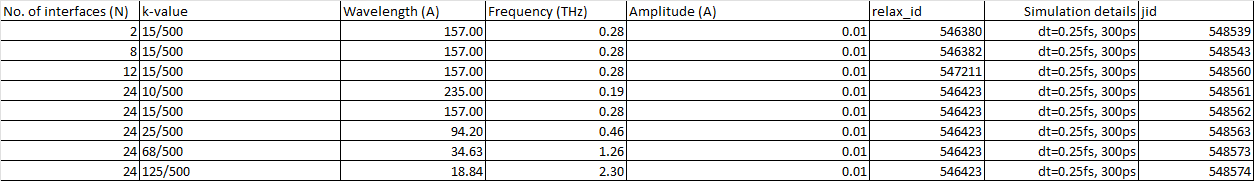

In [ ]:
# Loading the data for frequency 4 THz
avg_line = 1/0.1                 # 2ps/dt = no. of lines to average
line_loc = 75                    # location of axvline
Au_left_ini2 = -657018.52145483903587
Au_left_ini8 =  -656957.73083160701208
Au_left_ini12 = -652559.22925033897627
Au_left_ini24 =  -657291.98998337995727

# b = 1, int=2
header, dt, N_2 = read_file("./ETC_ERC_data/Energy_etc_erc_548539.dat", 7) 
pd_N_2, avg_N_2 = ERC_avg_multi_precise(Au_left_ini2, N_2, avg_line)

# b = 4, int=8
header, dt, N_8 = read_file("./ETC_ERC_data/Energy_etc_erc_548543.dat", 7) 
pd_N_8, avg_N_8 = ERC_avg_multi_precise(Au_left_ini8, N_8, avg_line)

# b = 6, int=12
header, dt, N_12 = read_file("./ETC_ERC_data/Energy_etc_erc_548560.dat", 7) 
pd_N_12, avg_N_12 = ERC_avg_multi_precise(Au_left_ini12, N_12, avg_line)

# b = 12, int=24
header, dt, N_24 = read_file("./ETC_ERC_data/Energy_etc_erc_548562.dat", 7) 
pd_N_24, avg_N_24 = ERC_avg_multi_precise(Au_left_ini24, N_24, avg_line)

# Plotting the ERC plot:
fig = plt.figure(figsize=(10,4))
plt.plot(avg_N_2['Time(ps)'], avg_N_2['ERC'], label='N = 2, f = 0.28 THz, l = 157 Å')
plt.plot(avg_N_8['Time(ps)'], avg_N_8['ERC'], label='N = 8, f = 0.28 THz, l = 157 Å')
plt.plot(avg_N_12['Time(ps)'], avg_N_12['ERC'], label='N = 12, f = 0.28 THz, l = 157 Å')
plt.plot(avg_N_24['Time(ps)'], avg_N_24['ERC'], label='N = 24, f = 0.28 THz, l = 157 Å')
# plt.xlim(0, 90)
# plt.ylim(0.5, 1.05)
# plt.axvline(line_loc, color='k', ls='--')
# plt.yscale('log')
plt.xlabel("Time(ps)")
plt.ylabel("ERC")
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
# plt.savefig("./ETC_ERC_data/ERC_varying_Au_MNL_interfaces.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

# Plotting the ETC plot:
fig = plt.figure(figsize=(10,4))
plt.plot(avg_N_2['Time(ps)'], avg_N_2['ETC'], label='N = 2, f = 0.28 THz, l = 157 Å')
plt.plot(avg_N_8['Time(ps)'], avg_N_8['ETC'], label='N = 8, f = 0.28 THz, l = 157 Å')
plt.plot(avg_N_12['Time(ps)'], avg_N_12['ETC'], label='N = 12, f = 0.28 THz, l = 157 Å')
plt.plot(avg_N_24['Time(ps)'], avg_N_24['ETC'], label='N = 24, f = 0.28 THz, l = 157 Å')
# plt.xlim(0, 90)
# plt.ylim(0.5, 1.05)
# plt.axvline(line_loc, color='k', ls='--')
# plt.yscale('log')
plt.xlabel("Time(ps)")
plt.ylabel("ETC")
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
# plt.savefig("./ETC_ERC_data/ETC_varying_Au_MNL_interfaces.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

## Au/MNL b =12, N=24 layer with frequency variation

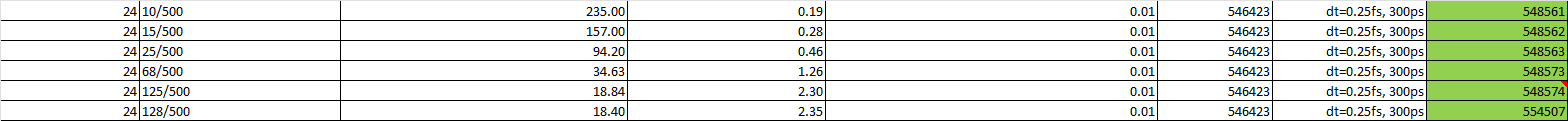

In [ ]:
# Comparing for b = 12, N=24 with varying frequency:
avg_line = 1/0.1                 # 2ps/dt = no. of lines to average
line_loc = 75                    # location of axvline
Au_left_ini = -657291.98998337995727
# b = 12, int=24, k=15
header, dt, k_10 = read_file("./ETC_ERC_data/Energy_etc_erc_548561.dat", 7) 
pd_k_10, avg_k_10 = ERC_avg_multi_precise(Au_left_ini, k_10, avg_line)

# b = 12, int=24, k=15
header, dt, k_15 = read_file("./ETC_ERC_data/Energy_etc_erc_548562.dat", 7) 
pd_k_15, avg_k_15 = ERC_avg_multi_precise(Au_left_ini, k_15, avg_line)

# b = 12, int=24, k=25
header, dt, k_25 = read_file("./ETC_ERC_data/Energy_etc_erc_548563.dat", 7) 
pd_k_25, avg_k_25 = ERC_avg_multi_precise(Au_left_ini, k_25, avg_line)

# b = 12, int=24, k=68
header, dt, k_68 = read_file("./ETC_ERC_data/Energy_etc_erc_548573.dat", 7) 
pd_k_68, avg_k_68 = ERC_avg_multi_precise(Au_left_ini, k_68, avg_line)

# b = 12, int=24, k=125
header, dt, k_125 = read_file("./ETC_ERC_data/Energy_etc_erc_548574.dat", 7) 
pd_k_125, avg_k_125 = ERC_avg_multi_precise(Au_left_ini, k_125, avg_line)

# b = 12, int=24, k=128
header, dt, k_128 = read_file("./ETC_ERC_data/Energy_etc_erc_554507.dat", 7) 
pd_k_128, avg_k_128 = ERC_avg_multi_precise(Au_left_ini, k_128, avg_line)

# Plotting the ERC plot:
fig = plt.figure(figsize=(10,4))
plt.plot(avg_k_10['Time(ps)'], avg_k_10['ERC'], label='f = 0.19 THz, l = 235 Å')
plt.plot(avg_k_15['Time(ps)'], avg_k_15['ERC'], label='f = 0.28 THz, l = 157 Å')
plt.plot(avg_k_25['Time(ps)'], avg_k_25['ERC'], label='f = 0.46 THz, l = 94.2 Å')
plt.plot(avg_k_68['Time(ps)'], avg_k_68['ERC'], label='f = 1.26 THz, l = 34.63 Å')
plt.plot(avg_k_125['Time(ps)'], avg_k_125['ERC'], label='f = 2.3 THz, l = 18.84 Å')
# plt.plot(avg_k_128['Time(ps)'], avg_k_128['ERC'], label='N = 24, f = 2.35 THz, l = 18.40 Å')

# plt.xlim(0, 90)
# plt.ylim(0.95, 1.01)
# plt.axvline(line_loc, color='k', ls='--')
# plt.yscale('log')
plt.xlabel("Time(ps)")
plt.ylabel("ERC")
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
# plt.savefig("./ETC_ERC_data/ERC_N_24_f_variation.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

# Plotting the ERC plot:
fig = plt.figure(figsize=(10,4))
plt.plot(avg_k_10['Time(ps)'], avg_k_10['ETC'], label='f = 0.19 THz, l = 235 Å')
plt.plot(avg_k_15['Time(ps)'], avg_k_15['ETC'], label='f = 0.28 THz, l = 157 Å')
plt.plot(avg_k_25['Time(ps)'], avg_k_25['ETC'], label='f = 0.46 THz, l = 94.2 Å')
plt.plot(avg_k_68['Time(ps)'], avg_k_68['ETC'], label='f = 1.26 THz, l = 34.63 Å')
plt.plot(avg_k_125['Time(ps)'], avg_k_125['ETC'], label='f = 2.3 THz, l = 18.84 Å')
# plt.plot(avg_k_128['Time(ps)'], avg_k_128['ETC'], label='N = 24, f = 2.35 THz, l = 18.40 Å')

# plt.xlim(0, 90)
# plt.ylim(0.95, 1.01)
# plt.axvline(line_loc, color='k', ls='--')
# plt.yscale('log')
plt.xlabel("Time(ps)")
plt.ylabel("ETC")
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
# plt.savefig("./ETC_ERC_data/ETC_N_24_f_variation.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

# 2. Variation of Frequency for Au/MNL b=2, N=4

### k number: 3 to 262

## Loading the data:

In [ ]:
Au_left_ini = -652169.37786703999154
avg_line = 0.5/0.1                 # 2ps/dt = no. of lines to average

# Reading multiple data at the same time:
#----------------------------------------

with open('./ETC_ERC_data/Au_MNL_b-2/k_val_jid_info.dat') as file:
    lines = file.readlines()
    header = lines[0].strip().split()
#     print(header)
    k_num_jid = np.array([list(map(float, line.strip().split())) for line in lines[1:]])

k_arr = k_num_jid[:, 0];             # K number 
freq_arr = k_num_jid[:, 3];          # LA frequency
jid=k_num_jid[:, 4].astype(int)      # job id

# Reading the data:
for i in np.arange(len(jid)):
    data_file = f'./ETC_ERC_data/Au_MNL_b-2/Energy_etc_erc_{jid[i]}.dat'
    header, dt,  globals()[f'k_{i}'] = read_file(data_file, 7) 
    globals()[f'pd_k_{i}'], globals()[f'avg_k_{i}'] = ERC_avg_multi_precise(Au_left_ini, globals()[f'k_{i}'], avg_line)
    
print(jid.shape, k_arr.shape, freq_arr.shape)

## Saving the ETC data:

In [ ]:
# Saving all ETC data:
ETC_data = pd.DataFrame()
ETC_col = []
for i in np.arange(len(jid)):
    ETC_data = pd.concat([ETC_data, globals()[f'avg_k_{i}']['ETC']], axis=1)
    ETC_col.append(f'ETC_{"{:.2f}".format(freq_arr[i])}')

# Replace NaN values with empty spaces
ETC_data.columns = ETC_col                                  # Provide the column names
ETC_data = pd.concat([globals()[f'avg_k_{len(jid)-1}']['Time(ps)'], ETC_data], axis=1) # Concatenating the time
ETC_data = ETC_data.fillna('-')                              # Fixing the NaNs
ETC_data.to_csv(f'ETC_ERC_data/Au_MNL_b-2/All_ETC_data_k_{k_arr[0]}_to_{k_arr[-1]}.dat', 
          index=False, float_format='%.5f')

In [ ]:
# # Frequency selection:
# f1=0
# f2=94
# f3 = 101
# f4 = len(freq_arr)

# freq_arr[f3:f4]
len(freq_arr)
# freq_arr[f4:f5]



### ENERGY REFLECTION COEFFICIENT

In [ ]:
# Frequency selection:
f1=0
f2=94
f3 = 101
f4 = 112
f5 = len(freq_arr)

# Control variables
#------------------
line_loc = 155                     # location of axvline

cmap = plt.get_cmap('brg')  # viridis, gist_rainbow, brg, Paired, jet, hsv

norm_freqs = (freq_arr - freq_arr[f1]) / (freq_arr[f5-1] - freq_arr[f1])
colors = [cmap(i) for i in norm_freqs]  # Generate 30 colors from the colormap
norm = mcolors.Normalize(vmin=freq_arr[f1], vmax=freq_arr[f5-1])
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Not using this for data, so just set to an empty array


# ENERGY REFLECTION COEFFICIENT

# Plotting the ERC f1:f2 plot:
#-------------------------------
# fig = plt.figure(figsize=(10,5))
for i in np.arange(len(jid[f1:f2])):
    i = i+f1
    plt.plot(globals()[f'avg_k_{i}']['Time(ps)'], globals()[f'avg_k_{i}']['ERC'], linewidth=2.5,
             color=colors[i], label=f'f = {freq_arr[i]} THz')

cbar = plt.colorbar(sm)
cbar.set_label('Frequency [THz]')
plt.xlim(0, 160)
plt.xlabel("Time(ps)")
plt.ylabel("Reflection coefficient")
plt.axvline(line_loc, color='k', ls='--')
# plt.legend([f'f = {i} THz' for i in freq_arr], loc='upper left', bbox_to_anchor=(1.2, 1.2), ncol=2)
# plt.savefig("./ETC_ERC_data/Au_MNL_b-2/ERC_N_4_f_variation1.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()


# Plotting the ERC f2:f3 plot:
#----------------------------
# fig = plt.figure(figsize=(10,5))
for i in np.arange(len(jid[f2:f3])):
    i = i+f2
    plt.plot(globals()[f'avg_k_{i}']['Time(ps)'], globals()[f'avg_k_{i}']['ERC'], linewidth=2.5,
             color=colors[i], label=f'f = {freq_arr[i]} THz')

cbar = plt.colorbar(sm)
cbar.set_label('Frequency [THz]')
plt.xlim(0, 200)
plt.ylim(0.35, 1.05)
plt.xlabel("Time(ps)")
plt.ylabel("Reflection coefficient")
plt.axvline(180, color='k', ls='--')
# plt.legend([f'f = {i} THz' for i in freq_arr], loc='upper left', bbox_to_anchor=(1.2, 1.2), ncol=2)
# plt.savefig("./ETC_ERC_data/Au_MNL_b-2/ERC_N_4_f_variation2.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()


# Plotting the ERC f3:f4 plot:
#----------------------------
# fig = plt.figure(figsize=(10,5))
for i in np.arange(len(jid[f3:f4])):
    i = i+f3
    plt.plot(globals()[f'avg_k_{i}']['Time(ps)'], globals()[f'avg_k_{i}']['ERC'], linewidth=2.5,
             color=colors[i], label=f'f = {freq_arr[i]} THz')

cbar = plt.colorbar(sm)
cbar.set_label('Frequency [THz]')
plt.xlim(0, 250)
plt.ylim(0.35, 1.05)
plt.xlabel("Time(ps)")
plt.ylabel("Reflection coefficient")
plt.axvline(220, color='k', ls='--')
# plt.legend([f'f = {i} THz' for i in freq_arr], loc='upper left', bbox_to_anchor=(1.2, 1.2), ncol=2)
# plt.savefig("./ETC_ERC_data/Au_MNL_b-2/ERC_N_4_f_variation3.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()


# Plotting the ERC f4:f5 plot:
#----------------------------
# fig = plt.figure(figsize=(10,5))
for i in np.arange(len(jid[f4:f5])):
    j = i+f4
    plt.plot(globals()[f'avg_k_{j}']['Time(ps)'], globals()[f'avg_k_{j}']['ERC'], linewidth=2.5,
             color=colors[j], label=f'f = {freq_arr[j]} THz')

cbar = plt.colorbar(sm)
cbar.set_label('Frequency [THz]')
plt.xlim(0, 350)
# plt.ylim(0.35, 1.05)
plt.xlabel("Time(ps)")
plt.ylabel("Reflection coefficient")
plt.axvline(320, color='k', ls='--')
# plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1.2), ncol=2)
# plt.savefig("./ETC_ERC_data/Au_MNL_b-2/ERC_N_4_f_variation4.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

### ENERGY TRANSMISSION COEFFICIENT

In [ ]:
# ENERGY TRANSMISSION COEFFICIENT

# Plotting the ETC f1:f2 plot:
#------------------------------
# fig = plt.figure(figsize=(10,5))

for i in np.arange(len(jid[f1:f2])):
    i = i + f1
    plt.plot(globals()[f'avg_k_{i}']['Time(ps)'], globals()[f'avg_k_{i}']['ETC'], linewidth=2.5,
             color=colors[i], label=f'f = {freq_arr[i]} THz')

cbar = plt.colorbar(sm)
cbar.set_label('Frequency [THz]')
plt.xlim(0, 160)
plt.xlabel("Time(ps)")
plt.ylabel("Transmission coefficient")
plt.axvline(line_loc, color='k', ls='--')
# plt.legend([f'f = {i} THz' for i in freq_arr], loc='upper left', bbox_to_anchor=(1.2, 1.2), ncol=2)
# plt.savefig("./ETC_ERC_data/Au_MNL_b-2/ETC_N_4_f_variation1.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

# Plotting the ETC f2:f3 plot:
#------------------------------
# fig = plt.figure(figsize=(10,5))

for i in np.arange(len(jid[f2:f3])):
    i = i + f2
    plt.plot(globals()[f'avg_k_{i}']['Time(ps)'], globals()[f'avg_k_{i}']['ETC'], linewidth=2.5,
             color=colors[i], label=f'f = {freq_arr[i]} THz')

cbar = plt.colorbar(sm)
cbar.set_label('Frequency [THz]')
plt.xlim(0, 200)
plt.ylim(-0.01, 0.65)
plt.xlabel("Time(ps)")
plt.ylabel("Transmission coefficient")
plt.axvline(180, color='k', ls='--')
# plt.legend([f'f = {i} THz' for i in freq_arr], loc='upper left', bbox_to_anchor=(1.2, 1.2), ncol=2)
# plt.savefig("./ETC_ERC_data/Au_MNL_b-2/ETC_N_4_f_variation2.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()


# Plotting the ETC f3:f4 plot:
#------------------------------
# fig = plt.figure(figsize=(10,5))

for i in np.arange(len(jid[f3:f4])):
    i = i + f3
    plt.plot(globals()[f'avg_k_{i}']['Time(ps)'], globals()[f'avg_k_{i}']['ETC'], linewidth=2.5,
             color=colors[i], label=f'f = {freq_arr[i]} THz')

cbar = plt.colorbar(sm)
cbar.set_label('Frequency [THz]')
plt.xlim(0, 250)
plt.ylim(-0.01, 0.65)
plt.xlabel("Time(ps)")
plt.ylabel("Transmission coefficient")
plt.axvline(220, color='k', ls='--')
# plt.legend([f'f = {i} THz' for i in freq_arr], loc='upper left', bbox_to_anchor=(1.2, 1.2), ncol=2)
# plt.savefig("./ETC_ERC_data/Au_MNL_b-2/ETC_N_4_f_variation3.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()


# Plotting the ETC f4:f5 plot:
#------------------------------
# fig = plt.figure(figsize=(10,5))

for i in np.arange(len(jid[f4:f5])):
    i = i + f4
    plt.plot(globals()[f'avg_k_{i}']['Time(ps)'], globals()[f'avg_k_{i}']['ETC'], linewidth=2.5,
             color=colors[i], label=f'f = {freq_arr[i]} THz')

cbar = plt.colorbar(sm)
cbar.set_label('Frequency [THz]')
plt.xlim(0, 350)
plt.ylim(-0.01, 0.65)
plt.xlabel("Time(ps)")
plt.ylabel("Transmission coefficient")
plt.axvline(320, color='k', ls='--')
# plt.legend([f'f = {i} THz' for i in freq_arr], loc='upper left', bbox_to_anchor=(1.2, 1.2), ncol=2)
# plt.savefig("./ETC_ERC_data/Au_MNL_b-2/ETC_N_4_f_variation4.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

### Energy transmission coefficient vs frequency

In [ ]:
# Averaging the data
ave_range = 2

range1 = 155
range2 = 180
range3 = 240
range4 = 320

# In the band f1:f2:
#--------------------
ETC_val_range1 = []
for i in np.arange(len(jid[f1:f2])):
    i = i+f1
    ETC_val_range1.append(globals()[f'avg_k_{i}'].loc[(globals()[f'avg_k_{i}']['Time(ps)'] >= range1) 
                                               & (globals()[f'avg_k_{i}']['Time(ps)'] <= range1+ave_range), 'ETC'].mean())
ETC_val_range1 = np.array(ETC_val_range1)

# In the band f2:f3:
#--------------------
ETC_val_range2 = []
for i in np.arange(len(jid[f2:f3])):
    i = i+f2
    ETC_val_range2.append(globals()[f'avg_k_{i}'].loc[(globals()[f'avg_k_{i}']['Time(ps)'] >= range2) 
                                               & (globals()[f'avg_k_{i}']['Time(ps)'] <= range2+ave_range), 'ETC'].mean())
ETC_val_range2 = np.array(ETC_val_range2)

# In the band f3:f4
#--------------------
ETC_val_range3 = []
for i in np.arange(len(jid[f3:f4])):
    i = i+f3
    ETC_val_range3.append(globals()[f'avg_k_{i}'].loc[(globals()[f'avg_k_{i}']['Time(ps)'] >= range3) 
                                               & (globals()[f'avg_k_{i}']['Time(ps)'] <= range3+ave_range), 'ETC'].mean())
ETC_val_range3 = np.array(ETC_val_range3)

# In the band f4:f5
#--------------------
ETC_val_range4 = []
for i in np.arange(len(jid[f4:f5])):
    i = i+f4
    ETC_val_range4.append(globals()[f'avg_k_{i}'].loc[(globals()[f'avg_k_{i}']['Time(ps)'] >= range3) 
                                               & (globals()[f'avg_k_{i}']['Time(ps)'] <= range3+ave_range), 'ETC'].mean())
ETC_val_range4 = np.array(ETC_val_range4)

# Now concatenate all:
ETC_val = np.concatenate((ETC_val_range1, ETC_val_range2, ETC_val_range3, ETC_val_range4))

ETC_val.shape

In [ ]:
# # Create a cubic spline interpolation
# spline = make_interp_spline(freq_arr, ETC_val)
# freq_new = np.linspace(np.min(freq_arr), np.max(freq_arr), 100)
# ETC_new = spline(freq_new)

# fig = plt.figure(figsize=(8,5))
plt.plot(freq_arr[:], ETC_val[:], 'or-', linewidth=2)    # markeredgecolor='k'
# plt.plot(freq_new[:], ETC_new[:], 'r--')
# plt.xlim(0, 1.2)
# plt.ylim(-0.02, 0.6)
plt.xlabel('Frequency [THz]')
plt.ylabel('Transmission coefficient')
plt.tick_params(axis='both', which='major')
# plt.yscale('log')
# plt.ylim(5e-04, 1)
# plt.xticks(np.arange(0.0, 0.016, 0.005), ['%.3f' % val for val in np.arange(0.0, 0.016, 0.005)])
# plt.savefig("./ETC_ERC_data/Au_MNL_b-2/Frequency_variation_ETCplot.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

# Displaying the values
# print("Frequency[THz] ", "ETC")
# print(np.hstack((freq_arr[None, :].T, ETC_val[None, :].T)))
np.savetxt("./ETC_ERC_data/Au_MNL_b-2/ETC_var_freq.dat", np.hstack((freq_arr[None, :].T, ETC_val[None, :].T)))

# Comment 1.9

In [ ]:
# Addressing reviewers comment:

Au_left_ini = -652169.37786703999154
avg_line = 0.2/0.1                 # 2ps/dt = no. of lines to average

# Reading multiple data at the same time:
#----------------------------------------

with open('./ETC_ERC_data/Au_MNL_b-2/k_val_jid_info.dat') as file:
    lines = file.readlines()
    header = lines[0].strip().split()
#     print(header)
    k_num_jid = np.array([list(map(float, line.strip().split())) for line in lines[1:]])

k_arr = k_num_jid[:, 0].astype(int);             # K number 
freq_arr = k_num_jid[:, 3];          # LA frequency
jid=k_num_jid[:, 4].astype(int)      # job id

# Reading the data:
for i,j in zip(k_arr, np.arange(len(jid))):
    data_file = f'./ETC_ERC_data/Au_MNL_b-2/Energy_etc_erc_{jid[j]}.dat'
    header, dt,  globals()[f'k_{j}'] = read_file(data_file, 7) 
    globals()[f'pd_k_{j}'], globals()[f'avg_k_{i}'] = ERC_avg_multi_precise(Au_left_ini, globals()[f'k_{j}'], avg_line)

In [ ]:
# GLOBAL CONTROL FOR THE PLOTS
plt.rcParams.update({'font.serif':'Arial', 'font.size': 11.0, 
                     'xtick.labelsize': 10, 'ytick.labelsize': 10,
                    'legend.fontsize':10,
                    'figure.dpi': 100.0, 'figure.figsize': [9, 5]})
# print(plt.rcParams)
# k_num_val = [83, 167, 176, 248]
k_num_val = [36]
for i in k_num_val:
    plt.subplots(figsize=(8,3))
    # Addressing reviewers comment:
    plt.plot(globals()[f'avg_k_{i}']['Time(ps)'], globals()[f'avg_k_{i}']['Au_left_energy'], linewidth = 1.5, color = 'royalblue', label="$E_{Reflected}$")
    plt.plot(globals()[f'avg_k_{i}']['Time(ps)'], globals()[f'avg_k_{i}']['Au_right_energy'], linewidth = 1.5, color = 'limegreen',label="$E_{Transmitted}$")
    plt.plot(globals()[f'avg_k_{i}']['Time(ps)'], globals()[f'avg_k_{i}']['Au_MNL_energy'], linewidth = 1.5, color = 'darkorange', label="$E_{Interface}$")
    plt.xlabel('Time (ps)')
    plt.ylabel('Energy (eV)')
    plt.legend(loc='center left', frameon=False)
    plt.xlim(0, 160)
    plt.savefig(f'./ETC_ERC_data/Au_MNL_b-2/Reviewer_comment_1.9/Energy_plot_k_val-{i}.png'
                , dpi=1200, bbox_inches = 'tight', facecolor="w")
    plt.show()

In [ ]:
import matplotlib.colors as mcolors


# Straight chains:

## Data location: /gpfs/u/home/TMPN/TMPNrjkh/scratch/6.Part-6_Phonon_wave_packet_simulation/Au_MNL_varying_interfaces/LA_phonon_wave_packet_simulation/Au_MNL_b-2/Straight_chain_sigmaf-1.27

In [23]:
Au_left_ini = -692411.51137183699757
avg_line = 0.2/0.1                 # 2ps/dt = no. of lines to average

# Reading multiple data at the same time:
#----------------------------------------

with open('./ETC_ERC_data/Au_MNL_b-2/Straight_chains/k_val_jid_info.dat') as file:
    lines = file.readlines()
    header = lines[0].strip().split()
#     print(header)
    k_num_jid = np.array([list(map(float, line.strip().split())) for line in lines[1:]])

k_arr = k_num_jid[:, 0].astype(int);             # K number 
freq_arr = k_num_jid[:, 3];          # LA frequency
jid=k_num_jid[:, 4].astype(int)      # job id

# Reading the data:
for i,j in zip(k_arr, np.arange(len(jid))):
    print(j, i)
    data_file = f'./ETC_ERC_data/Au_MNL_b-2/Straight_chains/Energy_etc_erc_{jid[j]}.dat'
    header, dt,  globals()[f'k_{j}'] = read_file(data_file, 7) 
    globals()[f'pd_k_{j}'], globals()[f'avg_k_{i}'] = ERC_avg_multi_precise(Au_left_ini, globals()[f'k_{j}'], avg_line)

0 9
1 80
2 103


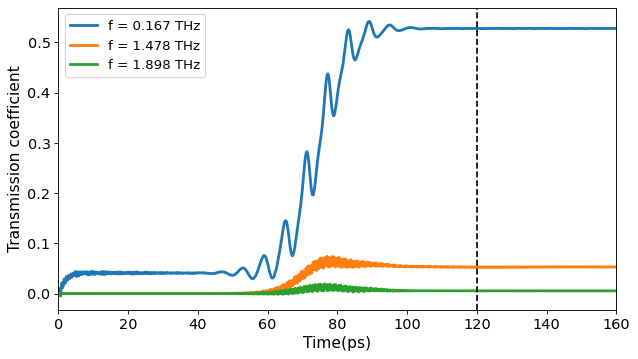

In [39]:
k_num_val = [9, 80, 103]
for i,j in zip(k_num_val, np.arange(len(jid))):
    plt.plot(globals()[f'avg_k_{i}']['Time(ps)'], globals()[f'avg_k_{i}']['ETC'], linewidth=2.5, label=f'f = {freq_arr[j]} THz')
plt.xlim(0, 160)
# plt.ylim(-0.01, 0.65)
plt.xlabel("Time(ps)")
plt.ylabel("Transmission coefficient")
plt.axvline(120, color='k', ls='--')
plt.legend()
plt.savefig("./ETC_ERC_data/Au_MNL_b-2/Straight_chains/Energy_transmission.png", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()
